In [1]:
import warnings; warnings.simplefilter('ignore')
import csv
import matplotlib.pyplot as plt 
import numpy as np 
import os
from sklearn.preprocessing import StandardScaler
from math import sqrt
from mpl_toolkits.mplot3d import Axes3D

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[[5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2], [4.7, 3.2, 1.3, 0.2], [4.6, 3.1, 1.5, 0.2], [5.0, 3.6, 1.4, 0.2]]


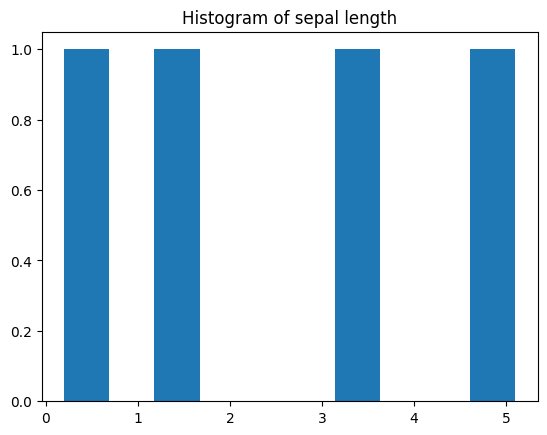

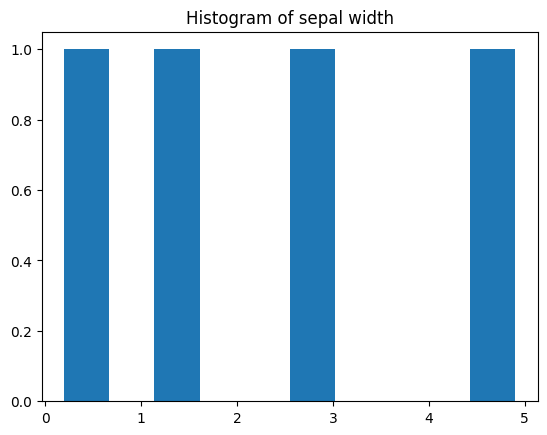

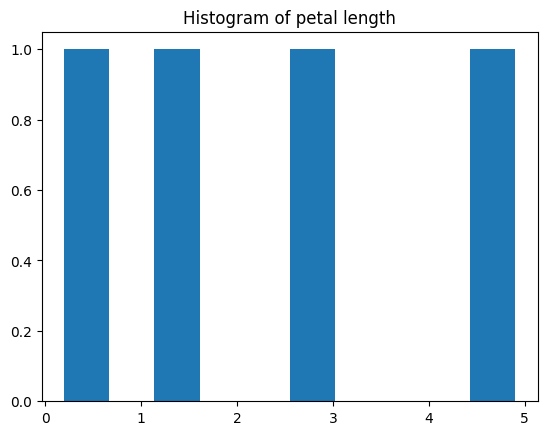

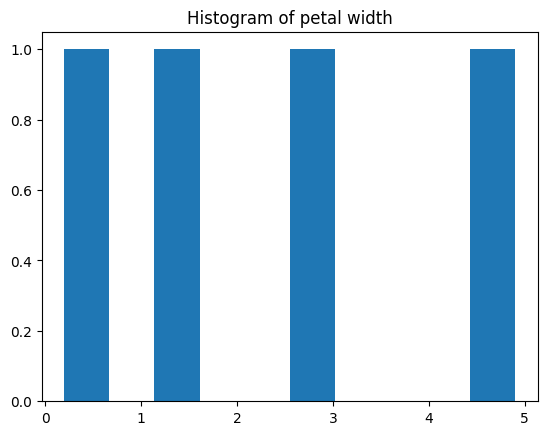

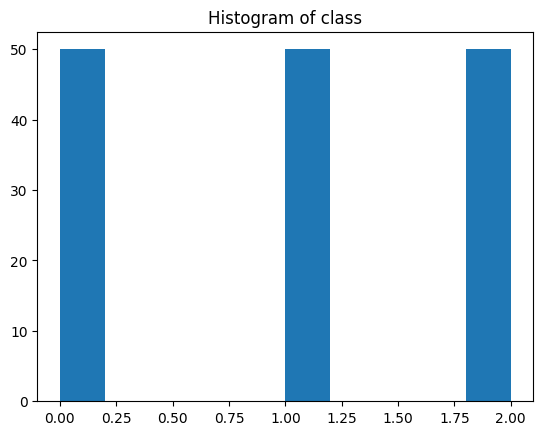

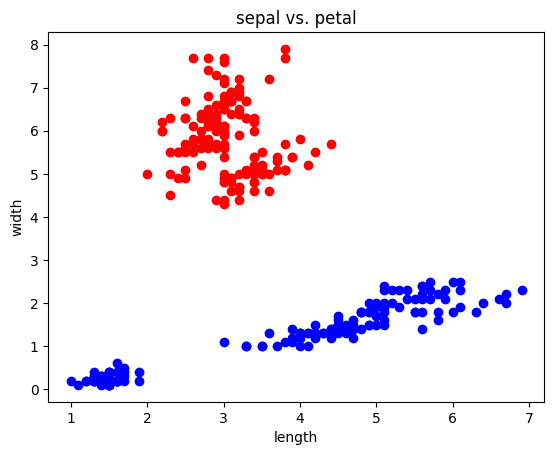

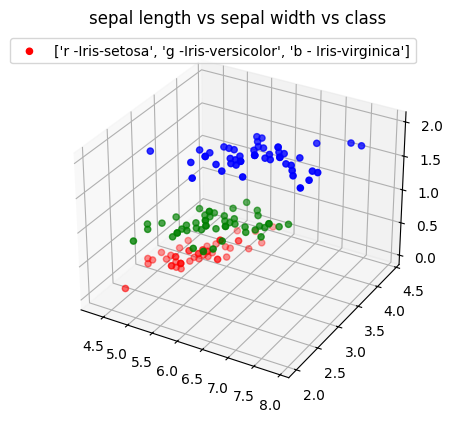

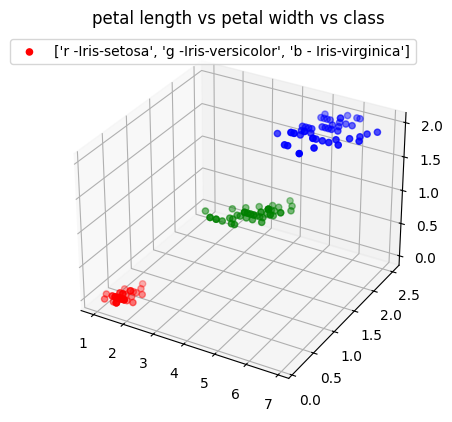

In [2]:
def loadDataMoreInputs(fileName, inputVariabNames, outputVariabName):
    def transform_output(output):
        if output == 'Iris-setosa':
            return 0
        elif output == 'Iris-versicolor':
            return 1
        elif output == 'Iris-virginica':
            return 2
        else:
            raise ValueError("Clasa de ieșire necunoscută: {}".format(output))

    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariables = [dataNames.index(var) for var in inputVariabNames]
    inputs = [[float(data[i][j]) for j in selectedVariables] for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [transform_output(data[i][selectedOutput]) for i in range(len(data))]
    
    return inputs, outputs

def plot3Ddata(x1Train, x2Train, yTrain, x1Model=None, x2Model=None, yModel=None, x1Test=None, x2Test=None, yTest=None, title=None):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    
    ax = plt.axes(projection='3d')
    
    if x1Train is not None:
        colors = ['r' if y == 0 else 'g' if y == 1 else 'b' for y in yTrain]
        labels = ['r -Iris-setosa', 'g -Iris-versicolor', 'b - Iris-virginica']
        ax.scatter(x1Train, x2Train, yTrain, c=colors, marker='o', label=labels)
    if x1Model is not None:
        ax.scatter(x1Model, x2Model, yModel, c='b', marker='o', label='learnt model')
    if x1Test is not None:
        ax.scatter(x1Test, x2Test, yTest, c='black', marker='^', label='test data')
    
    plt.title(title)
    plt.legend()
    plt.show()


def plot3DdataEstetic(x1Train, x2Train, yTrain, x1Model=None, x2Model=None, yModel=None, x1Test=None, x2Test=None, yTest=None, title=None):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    
    ax = plt.axes(projection='3d')
    
    if x1Train is not None:
        colors = ['r' if y == 0 else 'g' if y == 1 else 'b' for y in yTrain]
        labels = ['r -Iris-setosa', 'g -Iris-versicolor', 'b - Iris-virginica']
        ax.scatter(x1Train, x2Train, yTrain, c=colors, marker='o', label=labels)

    if x1Model is not None:
        ax.scatter(x1Model, x2Model, yModel, c='b', marker='o', label='Data 2')
    if x1Test is not None:
        ax.scatter(x1Test, x2Test, yTest, c='g', marker='^', label='Data 3')

    plt.title(title)
    plt.legend()
    plt.show()

def plot2Ddata(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'D:\FACULTATE\SEM4\AI\Lab6\iris', 'iris.csv')

inputs, outputs = loadDataMoreInputs(filePath, ['sepal length', 'sepal width', 'petal length', 'petal width'], 'class')
print(outputs)
print(inputs[:5])

feature1 = [ex[0] for ex in inputs]
feature2 = [ex[1] for ex in inputs]
feature3 = [ex[2] for ex in inputs]
feature4 = [ex[3] for ex in inputs]

# plot the data histograms
plot2Ddata(inputs[0], "sepal length")
plot2Ddata(inputs[1], "sepal width")
plot2Ddata(inputs[1], "petal length")
plot2Ddata(inputs[1], "petal width")

plot2Ddata(outputs, 'class')


plt.plot(feature2, feature1, 'ro') 
plt.plot(feature3,feature4,'bo')
plt.xlabel('length')
plt.ylabel('width')
plt.title('sepal vs. petal')
plt.show()

# check the liniarity (to check that a linear relationship exists between the dependent variable (y = happiness) and the independent variables (x1 = capita, x2 = freedom).)
plot3DdataEstetic(feature1, feature2, outputs, title='sepal length vs sepal width vs class')
plot3DdataEstetic(feature3, feature4, outputs, title='petal length vs petal width vs class')


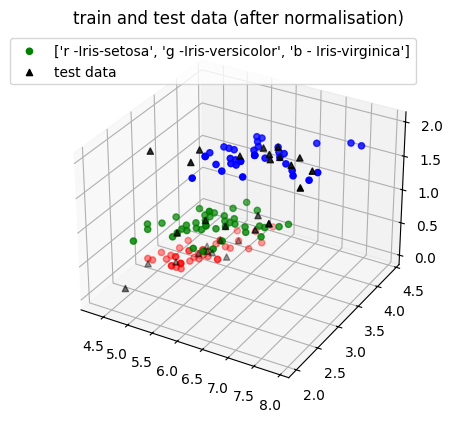

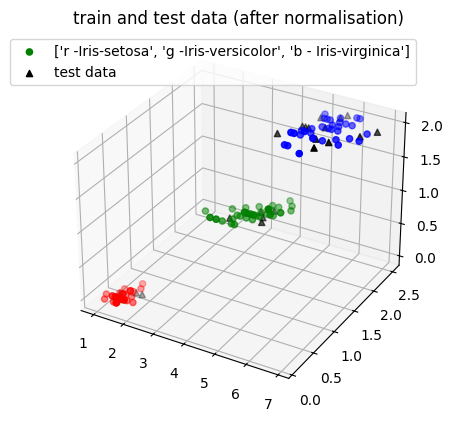

In [3]:
np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
testSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]
testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]


feature1train = [ex[0] for ex in trainInputs]
feature2train = [ex[1] for ex in trainInputs]
feature3train = [ex[2] for ex in trainInputs]
feature4train = [ex[3] for ex in trainInputs]

feature1test = [ex[0] for ex in testInputs]
feature2test = [ex[1] for ex in testInputs]
feature3test = [ex[2] for ex in testInputs]
feature4test = [ex[3] for ex in testInputs]

plot3Ddata(feature1train, feature2train, trainOutputs, None, None, None, feature1test, feature2test, testOutputs, "train and test data (after normalisation)")
plot3Ddata(feature3train, feature4train, trainOutputs, None, None, None, feature3test, feature4test, testOutputs, "train and test data (after normalisation)")


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
# Definirea și antrenarea modelului
model = LinearRegression()
model.fit(trainInputs, trainOutputs)

# Evaluarea modelului
accuracy = model.score(testInputs, testOutputs)
print("Accuracy:", accuracy)

# Obținerea coeficienților și interceptării
w1,w2,w3,w4 = model.coef_
w0 = model.intercept_


print("Model coefficients:")
print("f(x) =  1/ 1+ e^-z... z= ", w0, ' + ', w1, ' * x1 + \n\t\t\t', w2, ' * x2' , w3, ' * x4', w4, ' * x4')



print()


modelIncrucisat = LinearRegression()
scores = cross_val_score(modelIncrucisat, trainInputs, trainOutputs, cv=5)  
predictions = cross_val_predict(modelIncrucisat, trainInputs, trainOutputs, cv=5)
modelIncrucisat.fit(trainInputs, trainOutputs)
w1Incrucisat,w2Incrucisat,w3Incrucisat,w4Incrucisat = modelIncrucisat.coef_
w0Incrucisat = modelIncrucisat.intercept_
print("Predictie", mean(predictions))
print("CROSS-VAL f(x) =  1/ 1+ e^-z... z= ", w0Incrucisat, ' + ', w1Incrucisat, ' * x1 + \n\t\t\t', w2Incrucisat, ' * x2' , w3Incrucisat, ' * x4', w4Incrucisat, ' * x4')

Accuracy: 0.9459825566387514
Model coefficients:
f(x) =  1/ 1+ e^-z... z=  0.07656732619661677  +  -0.06209080120065371  * x1 + 
			 -0.06954694150850632  * x2 0.2058354194912708  * x4 0.5997842865082489  * x4

Predictie 0.9741256811778634
CROSS-VAL f(x) =  1/ 1+ e^-z... z=  0.07656732619661677  +  -0.06209080120065371  * x1 + 
			 -0.06954694150850632  * x2 0.2058354194912708  * x4 0.5997842865082489  * x4


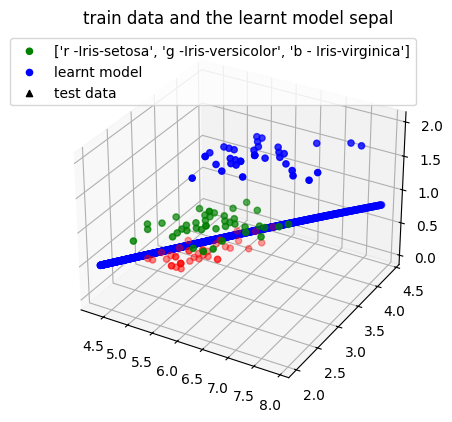

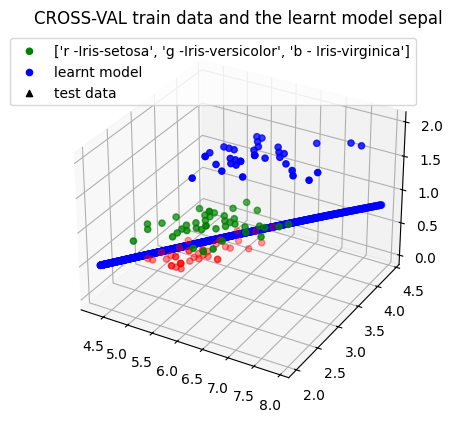

In [5]:
import numpy as np
from statistics import mean
trainInputs = np.array(trainInputs)
noOfPoints = 1000
xref1 = []
val = min(trainInputs[:, 0])
step1 = (max(trainInputs[:, 0]) - min(trainInputs[:, 0])) / noOfPoints
for _ in range(noOfPoints):
    xref1.append(val)
    val += step1

xref2 = []
val = min(trainInputs[:, 1])
step2 = (max(trainInputs[:, 1]) - min(trainInputs[:, 1])) / noOfPoints
for _ in range(noOfPoints):
    xref2.append(val)
    val += step2

xref3 = []
val = min(trainInputs[:, 2])
step3 = (max(trainInputs[:, 2]) - min(trainInputs[:, 2])) / noOfPoints
for _ in range(noOfPoints):
    xref3.append(val)
    val += step2

xref4 = []
val = min(trainInputs[:, 3])
step2 = (max(trainInputs[:, 3]) - min(trainInputs[:, 3])) / noOfPoints
for _ in range(noOfPoints):
    xref4.append(val)
    val += step2

yref = [1 / (1 + np.exp(-(w0 + w1 * el1 + w2 * el2 + w3 * el3 + w4 * el4))) for el1, el2, el3, el4 in zip(xref1, xref2, xref3, xref4)]
yrefCROSS = [1 / (1 + np.exp(-(w0Incrucisat + w1Incrucisat * el1 + w2Incrucisat * el2 + w3Incrucisat * el3 + w4Incrucisat * el4))) for el1, el2, el3, el4 in zip(xref1, xref2, xref3, xref4)]
#print(yref)
plot3Ddata(feature1train, feature2train, trainOutputs, xref1, xref2, yref, [], [], [], 'train data and the learnt model sepal')
plot3Ddata(feature1train, feature2train, trainOutputs, xref1, xref2, yrefCROSS, [], [], [], 'CROSS-VAL train data and the learnt model sepal')

In [6]:
computedTestOutputs = model.predict(testInputs)
computedTestOutputsCross = predictions

In [10]:
from sklearn.metrics import mean_squared_error

error = 0.0
for t1, t2 in zip(computedTestOutputs, testOutputs):
    error += (t1 - t2) ** 2
error = error / len(testOutputs)
print("Normal")
print('prediction error (manual): ', error)

error = 1 - accuracy

print('prediction error (tool):   ', error)




print("Cross-VAL")
mean_accuracy = scores.mean()
error = 1 - mean_accuracy

print('prediction error (tool):   ', error)

Normal
prediction error (manual):  0.04087319881001142
prediction error (tool):    0.054017443361248585
Cross-VAL
prediction error (tool):    0.08329031762467809


In [11]:
ec = 1 / (1 + np.exp(-(w0 + w1 * 5.35 + w2 * 3.85 + w3 * 1.25 + w4 * 0.4)))
ecCROSS = 1 / (1 + np.exp(-(w0Incrucisat + w1Incrucisat * 5.35 + w2Incrucisat * 3.85 + w3Incrucisat * 1.25 + w4Incrucisat * 0.4)))
print("Rez ec", ec)
if ec >=0 and ec < 0.33:
    print("Iris-setosa")
elif ec >= 0.33 and ec < 0.66:
    print("Iris-versicolor")
else:
    print("Iris-virginica")
print()
print("Rez ec CROSS", ecCROSS)
if ecCROSS >=0 and ecCROSS < 0.33:
    print("Iris-setosa")
elif ecCROSS >= 0.33 and ecCROSS < 0.66:
    print("Iris-versicolor")
else:
    print("Iris-virginica")

Rez ec 0.4934588241910676
Iris-versicolor

Rez ec CROSS 0.4934588241910676
Iris-versicolor
